<a href="https://colab.research.google.com/github/tiachoi2001/ToBigs20/blob/main/Week6_TimeSeries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 20기 Time Series 정규세션 과제

### Electric_Production.csv 데이터를 활용하여 자유롭게 시계열분석을 진행해주세요.
첨부한 '시계열자료_실습.ipynb' 코드를 참고하셔도 좋습니다.


### Box-Jenkins 방법론
![image.png](attachment:image.png)

### Prophet
튜토리얼 : https://hyperconnect.github.io/2020/03/09/prophet-package.html

## 라이브러리 불러오기

In [ ]:
!pip install pmdarima

In [ ]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
from pmdarima.arima import auto_arima
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller, kpss
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARIMA
from pandas import datetime
from statsmodels.tsa.arima_model import ARIMAResults

<ipython-input-2-1312833df264>:12: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


## 데이터 불러오기

In [ ]:
samsung_df = yf.download('005930.KS',
                      start='2020-01-01',
                      end='2021-04-21',
                      progress=False)

samsung_df = samsung_df[["Close"]]

samsung_df = samsung_df.reset_index()

samsung_df.columns = ['day', 'price']

samsung_df['day'] = pd.to_datetime(samsung_df['day'])

samsung_df.index = samsung_df['day']
samsung_df.set_index('day', inplace=True)

samsung_df

,price
day,
2020-01-02,55200.0
2020-01-03,55500.0
2020-01-06,55500.0
2020-01-07,55800.0
2020-01-08,56800.0
...,...
2021-04-14,84000.0
2021-04-15,84100.0
2021-04-16,83900.0


In [ ]:
samsung_df.isna().sum()

price    0
dtype: int64

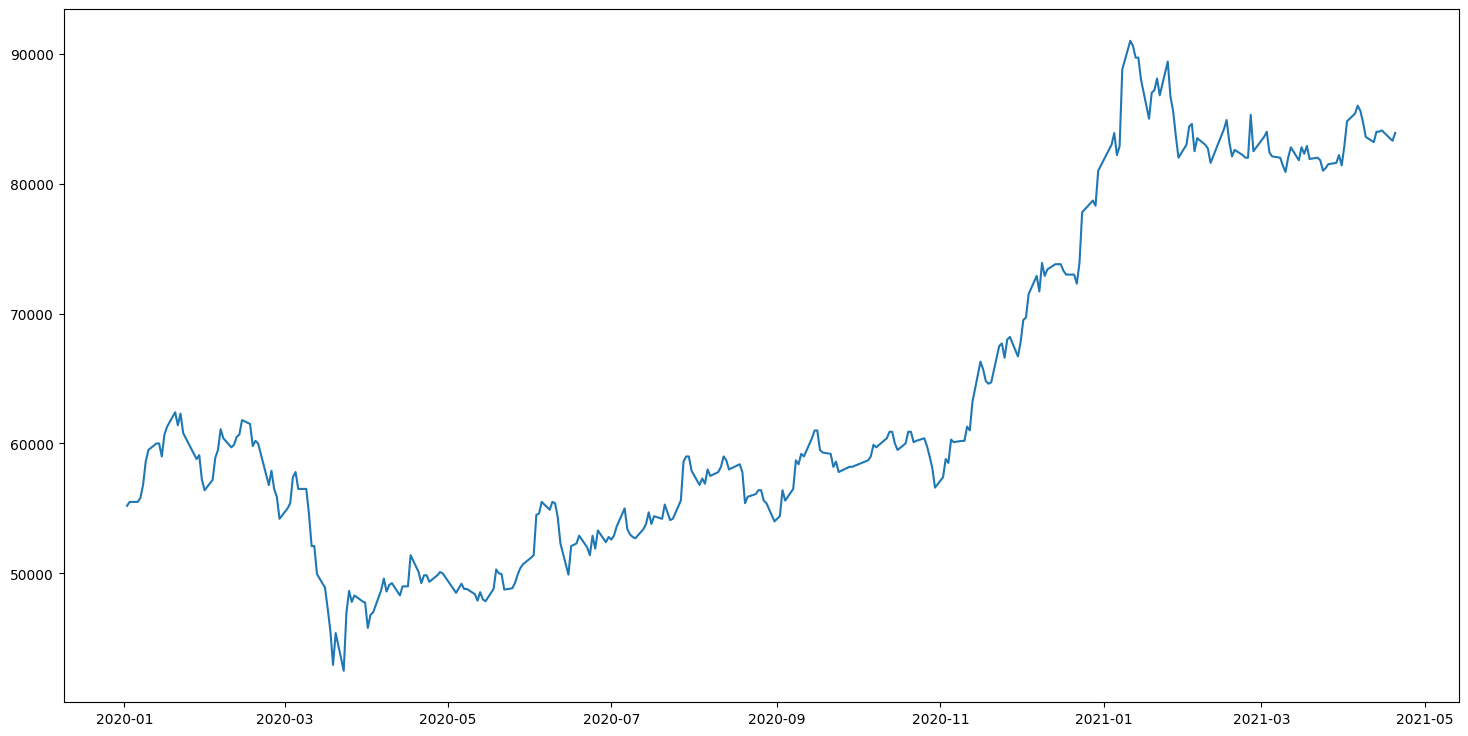

In [ ]:
plt.figure(figsize=(18,9))
plt.plot(samsung_df.index, samsung_df)
plt.xlabel=('day')
plt.ylabel=('price')
plt.show()

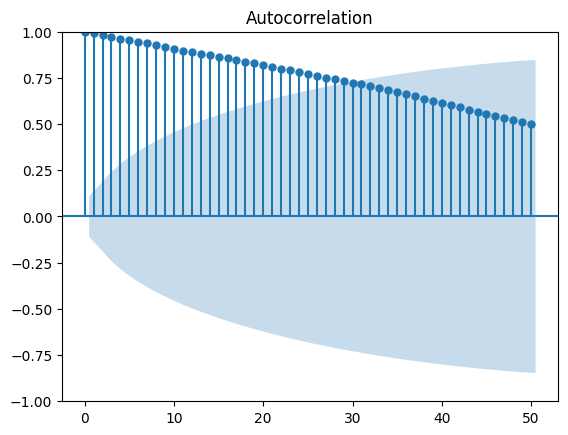

In [ ]:
plot_acf(samsung_df, lags=50)
plt.show()

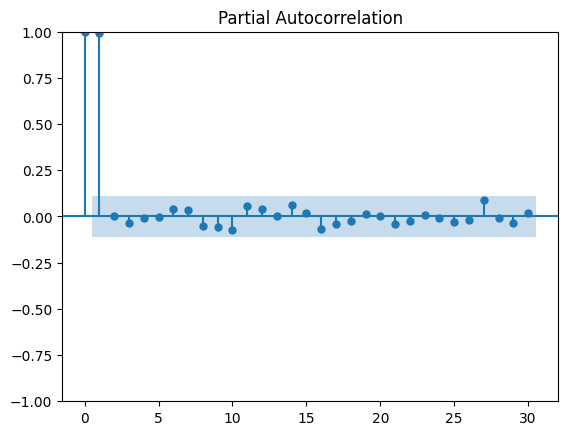

In [ ]:
plot_pacf(samsung_df, lags=30)
plt.show()

In [ ]:
diff_data = samsung_df.diff(1).dropna()

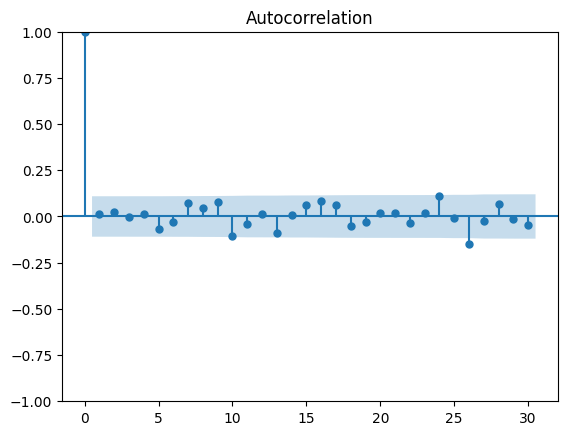

In [ ]:
plot_acf(diff_data, lags=30)
plt.show()

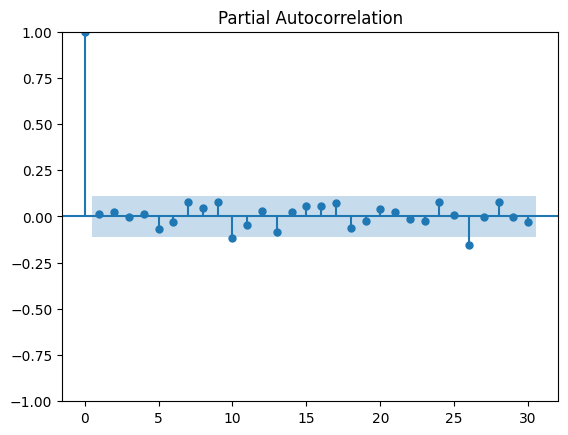

In [ ]:
plot_pacf(diff_data, lags=30)
plt.show()

In [ ]:
diff_data.head()

,price
day,
2020-01-03,300.0
2020-01-06,0.0
2020-01-07,300.0
2020-01-08,1000.0
2020-01-09,1800.0


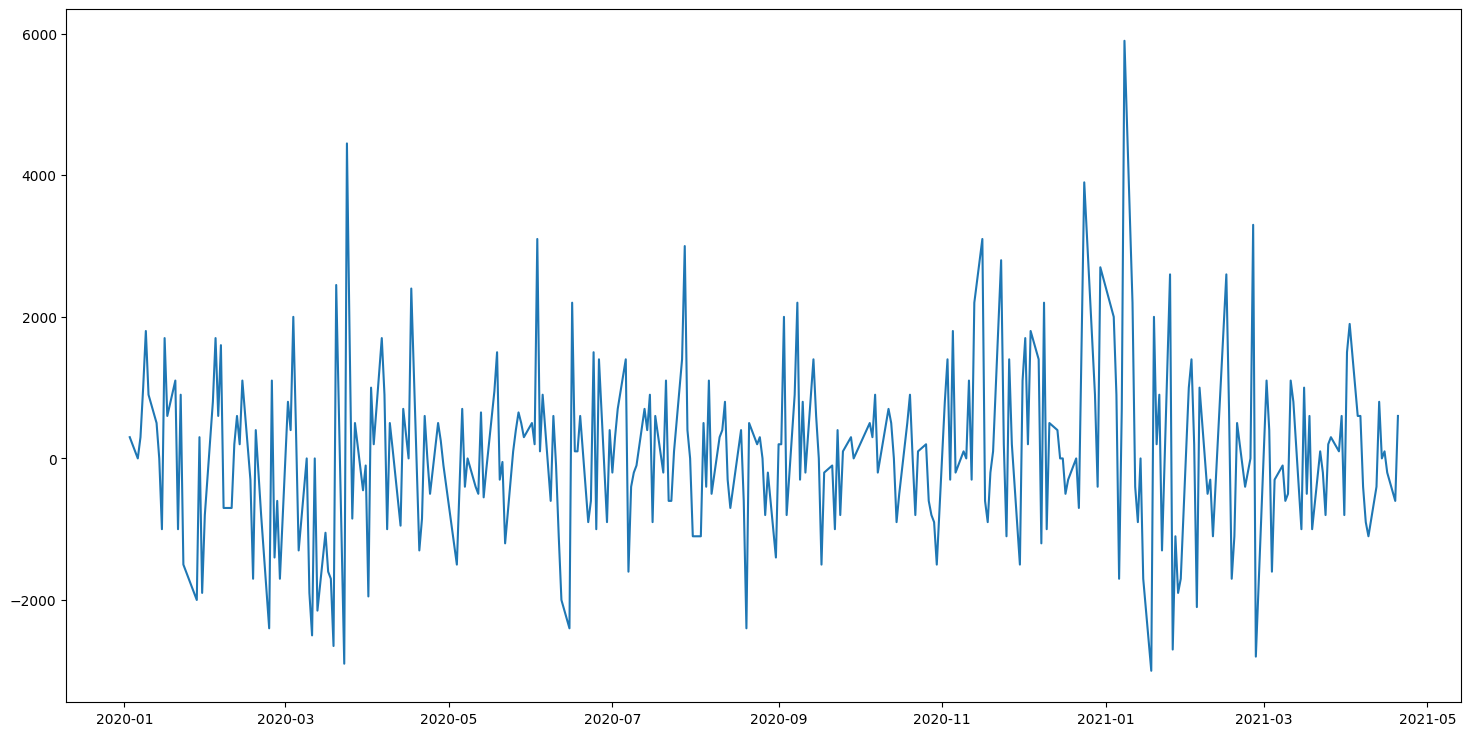

In [ ]:
plt.figure(figsize=(18,9))
plt.plot(diff_data.index, diff_data)
plt.xlabel=('day')
plt.ylabel=('price')
plt.show()

In [ ]:
from pmdarima.arima import auto_arima

arima_model = auto_arima(y=samsung_df,
        seasonal=True,
        D=1,
        m=12,
        trace=True
)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,1,1)[12]             : AIC=inf, Time=5.71 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=5488.114, Time=0.07 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=5461.382, Time=0.48 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=5443.234, Time=1.85 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=5488.109, Time=0.13 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=inf, Time=6.18 sec
 ARIMA(0,1,1)(0,1,2)[12]             : AIC=5425.450, Time=6.85 sec
 ARIMA(0,1,1)(1,1,2)[12]             : AIC=inf, Time=13.47 sec
 ARIMA(0,1,0)(0,1,2)[12]             : AIC=5425.162, Time=3.47 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=5442.487, Time=0.65 sec
 ARIMA(0,1,0)(1,1,2)[12]             : AIC=inf, Time=4.96 sec
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=inf, Time=1.20 sec
 ARIMA(1,1,0)(0,1,2)[12]             : AIC=5434.961, Time=1.13 sec
 ARIMA(1,1,1)(0,1,2)[12]             : AIC=inf, Time=6.14 sec
 ARIMA(0,1,0)(0,1,2)[12] intercept   : AIC=5426.

In [ ]:
len(samsung_df)/10

32.2

In [ ]:
train_data = samsung_df[:len(samsung_df)-32]
test_data = samsung_df[len(samsung_df)-32:]

In [ ]:
fit = arima_model.fit(train_data)
pred = fit.predict(n_periods=len(test_data))

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [ ]:
pred_df = pd.DataFrame(pred.values, index = test_data.index)
pred_df

,0
day,
2021-03-08,80973.371908
2021-03-09,80335.444047
2021-03-10,80863.992447
2021-03-11,80806.271153
2021-03-12,80212.378556
2021-03-15,80557.130867
2021-03-16,82786.478873
2021-03-17,81334.359181
2021-03-18,81613.255162


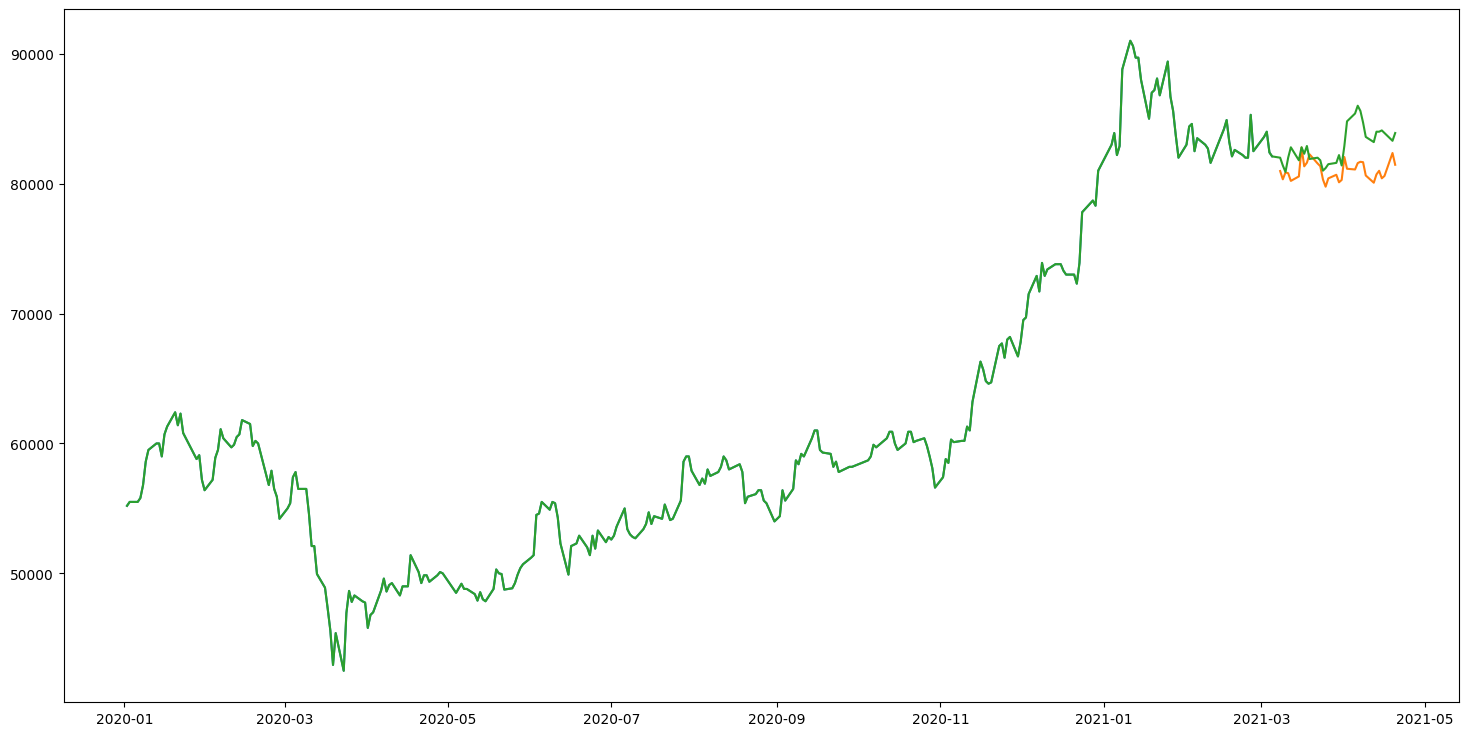

In [ ]:
plt.figure(figsize=(18,9))
plt.plot(samsung_df.index, pd.concat([train_data, pred_df]))
plt.plot(samsung_df.index, samsung_df)
plt.xlabel=('day')
plt.ylabel=('price')
plt.show()